# Imports

In [1]:
from UpliftTarget import Variable, And, Or
from UpliftData import source_data

18:20:49 [INFO] Started loading binary file ...
18:20:49 [INFO] Reading from file C:\Users\kpf\data\axinova\ax_data.feather
18:20:49 [INFO] ... finished loading binary file in 0.38s (1.3s CPU)
18:20:49 [INFO] Started loading binary file ...
18:20:49 [INFO] Reading from file C:\Users\kpf\data\axinova\ax_var_struct.feather
18:20:49 [INFO] ... finished loading binary file in 0.0s (0.02s CPU)
18:20:49 [INFO] Started loading pickle file ...
18:20:49 [INFO] Reading from file C:\Users\kpf\data\axinova\population_ratios.pkl
18:20:49 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
18:20:49 [INFO] Started loading pickle file ...
18:20:49 [INFO] Reading from file C:\Users\kpf\data\axinova\global_code_ratios.pkl
18:20:49 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
18:20:49 [INFO] Started loading pickle file ...
18:20:49 [INFO] Reading from file C:\Users\kpf\data\axinova\station_code_ratios.pkl
18:20:49 [INFO] ... finished loading pickle file in 0.0s (0.0s CPU)
18:20:49 [I

# Functions

In [2]:
def best_slots(target, column, top_n: int = 20, where=""):
    if where:
        data = target.result.query(where)
    else:
        data = target.result
    data = data.sort_values(column, ascending=False).head(top_n)[
        "spr target_ratio target_pers pop_ratio pop_uplift_ratio pop_uplift_pers".split()
    ]
    return data

# Target Group Definitions

In [ ]:
source_data.variable_table("md_SexAgeEk")

## Jung, hohes Einkommen

In [ ]:
TargetJungHoch = Variable(
    "Jung, EK hoch", variable="md_SexAgeEk", code_nr=[4, 5, 32, 33]
)

print(TargetJungHoch.description())

In [ ]:
TargetJungHoch.set_timescale("Hour")

In [ ]:
%%time
TargetJungHoch.calculate()

In [ ]:
TargetJungHoch.export_result()

### Best Slots

In [ ]:
best_slots(
    TargetJungHoch, column="pop_uplift_ratio", top_n=50, where="target_pers >= 1000"
)

## Jung, weiblich, mittleres oder hohes Einkommen

In [3]:
TargetJungWMittelHoch = Variable(
    "Jung, w, EK mittel/hoch", variable="md_SexAgeEk", code_nr=[30, 31, 32, 33]
)

print(TargetJungWMittelHoch.description())

Jung, w, EK mittel/hoch: 'Geschlecht / Alter / Einkommen' IN ['weiblich/ 14-29 Jahre/ Zwischen 4'501 und 6'000 CHF', 'weiblich/ 14-29 Jahre/ Zwischen 6'001 und 9'000 CHF', 'weiblich/ 14-29 Jahre/ Zwischen 9'001 und 12'000 CHF', 'weiblich/ 14-29 Jahre/ Mehr als 12'000 CHF']


In [4]:
TargetJungWMittelHoch.set_timescale("Hour")

In [5]:
%%time
TargetJungWMittelHoch.calculate()

Wall time: 1.15 s


In [ ]:
TargetJungWMittelHoch.export_result()

### Best Slots

In [ ]:
best_slots(TargetJungWMittelHoch, "pop_uplift", top_n=50, where="target_pers > 1000")

### Plots

In [ ]:
TargetJungWMittelHoch.plot_ch_uplift_heatmap()

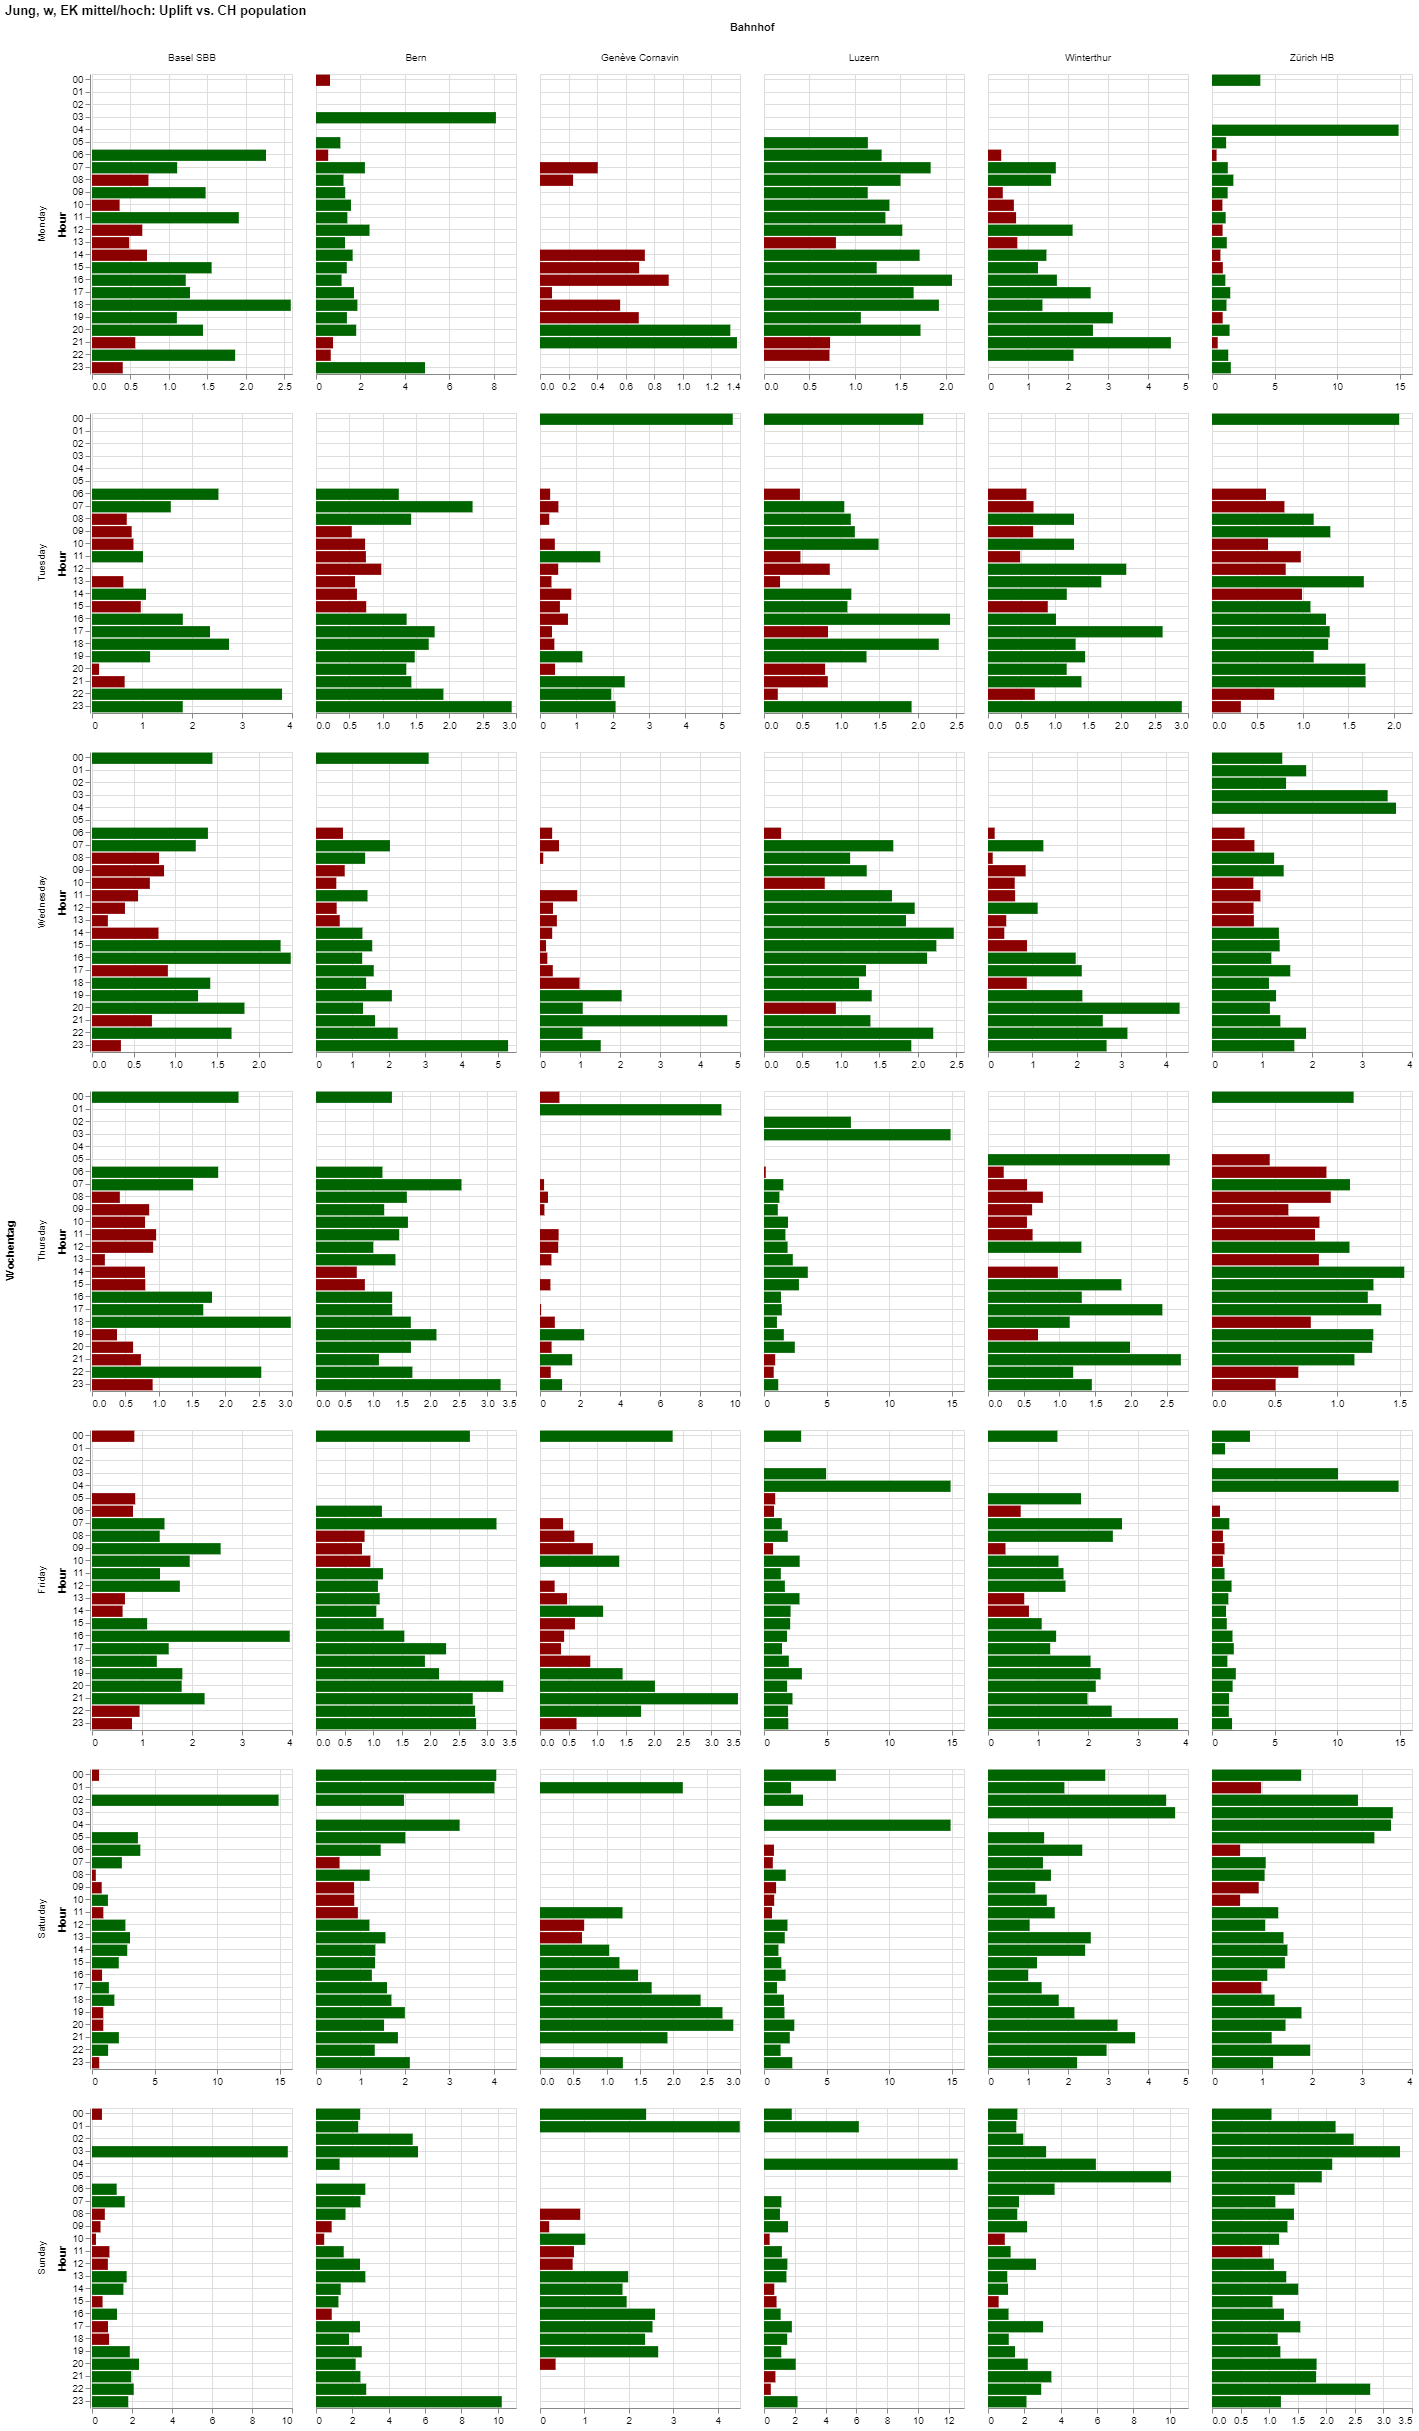

In [9]:
TargetJungWMittelHoch.plot_ch_uplift_barplot(
    {
        "Station": [
            "Basel SBB",
            "Bern",
            "Genève Cornavin",
            "Luzern",
            "Winterthur",
            "Zürich HB",
        ]
    },
    target_col="pop_uplift_ratio",
    target_threshold=1,
)